In [1]:
import matplotlib.pyplot as plt
import json
import numpy as np

<h3> Loss Plot </h3>

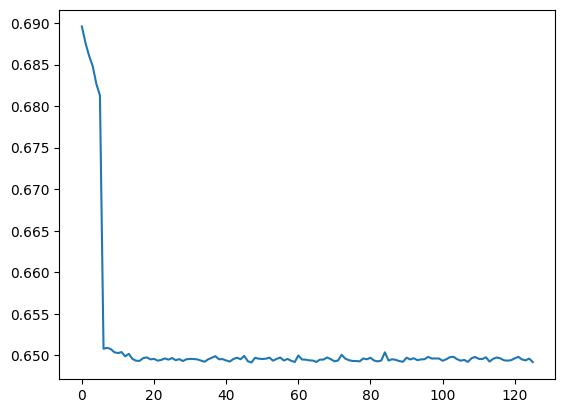

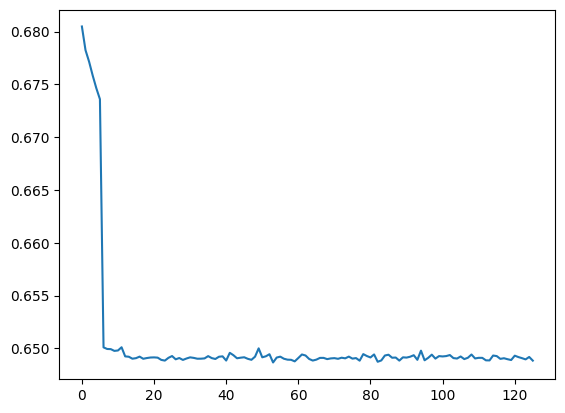

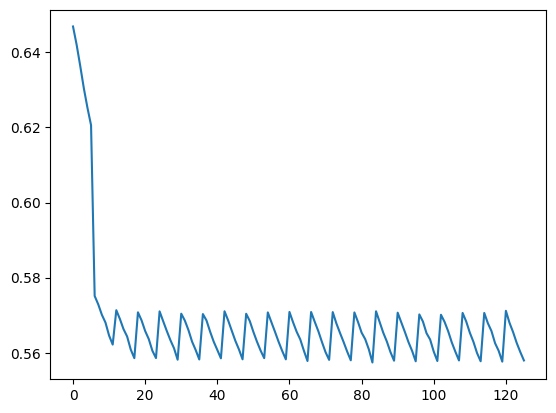

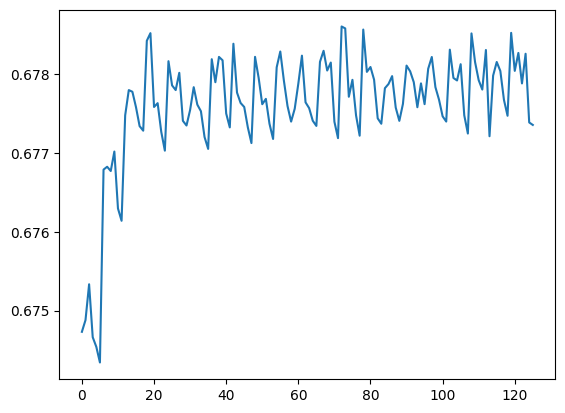

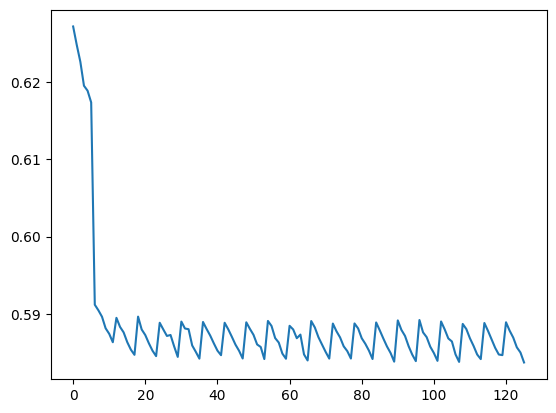

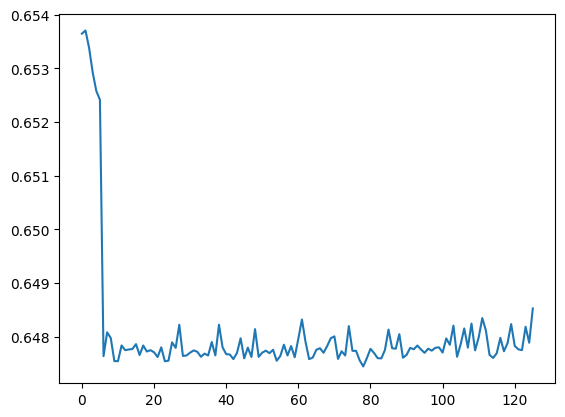

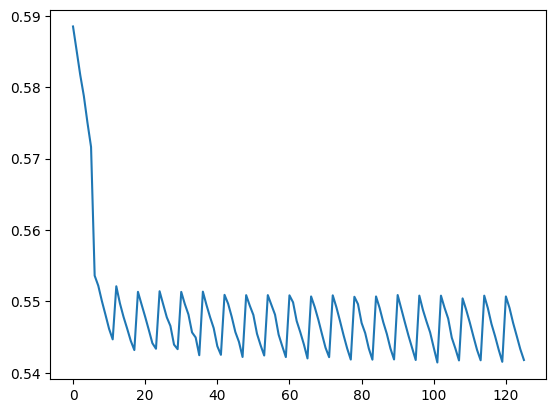

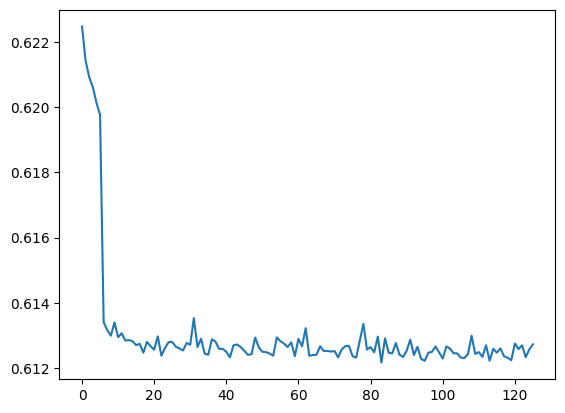

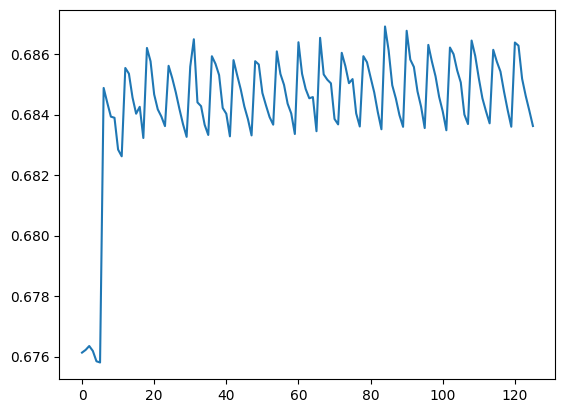

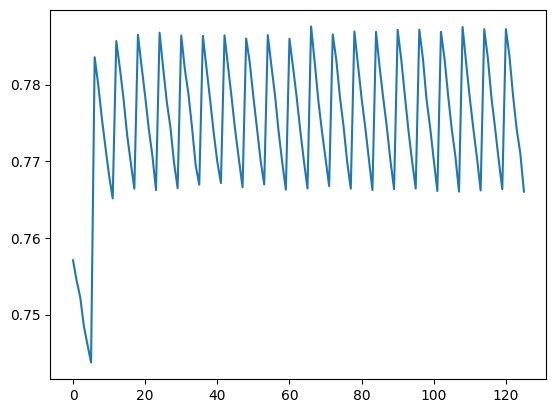

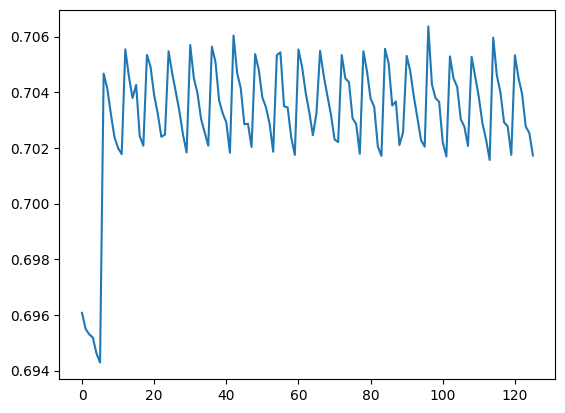

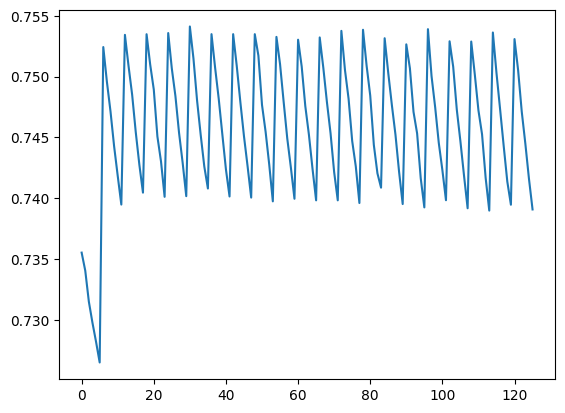

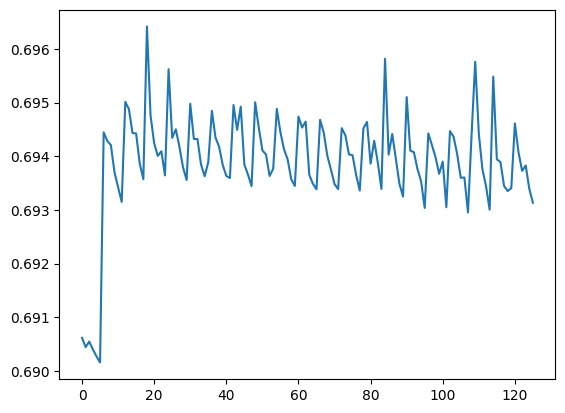

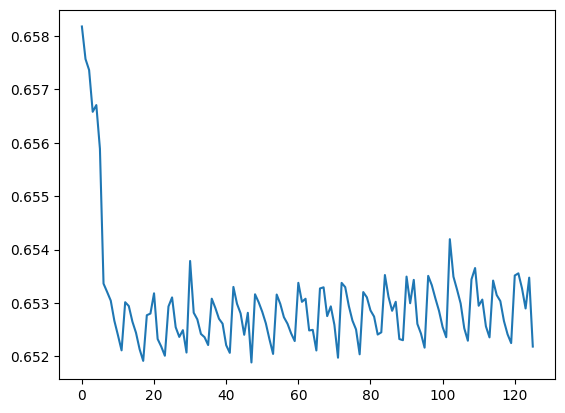

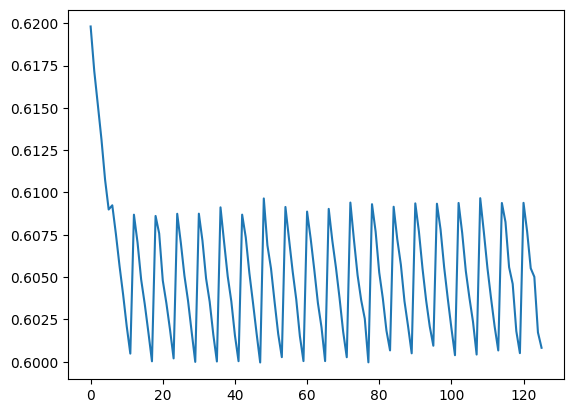

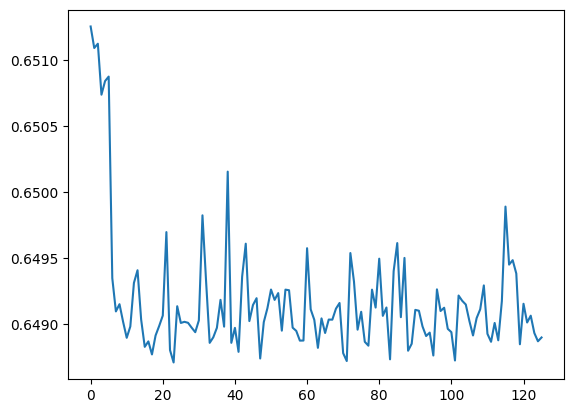

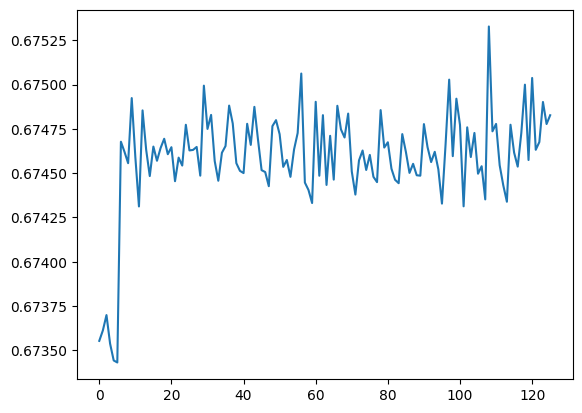

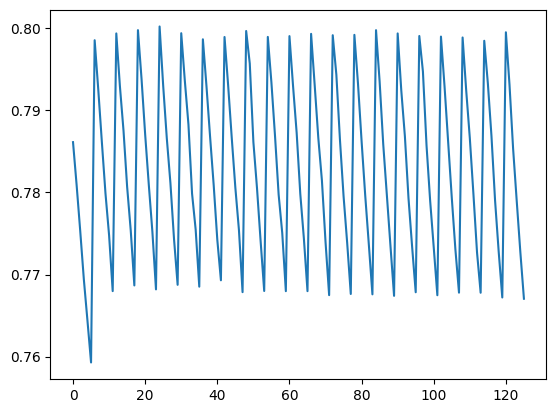

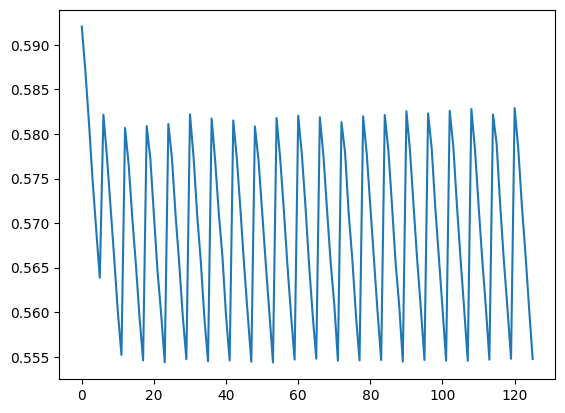

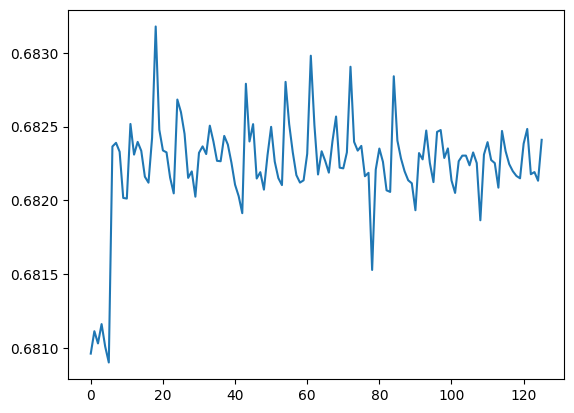

In [41]:
Loss_b_file = open("trainingFinal_modelB.json")
Loss_B = json.load(Loss_b_file)
loss_b = {}
for i in range(0, 20):
    loss_b[i] = []
count = 0
for i in Loss_B:
    loss_b[count%20].extend(i['loss'])
    count += 1
for i in range(0,20):
    plt.plot(loss_b[i])
    plt.show()

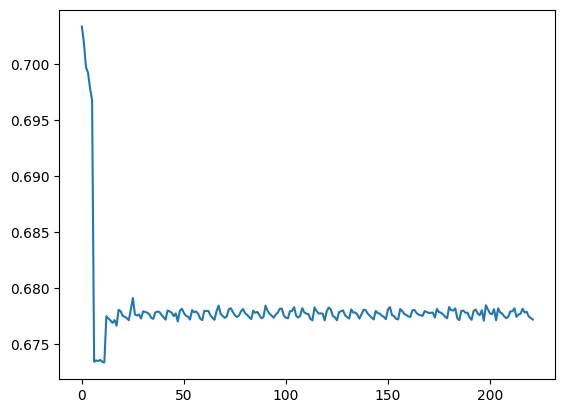

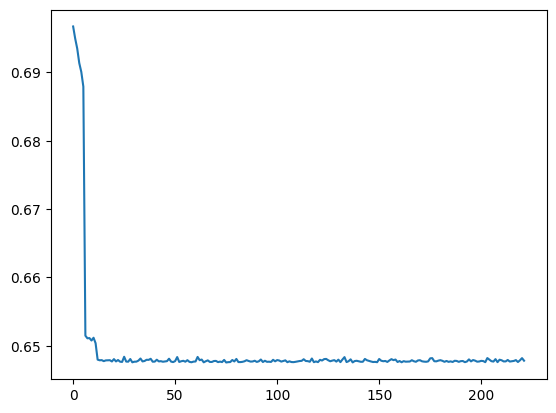

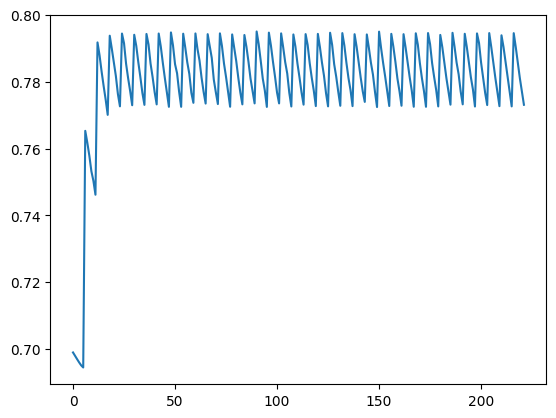

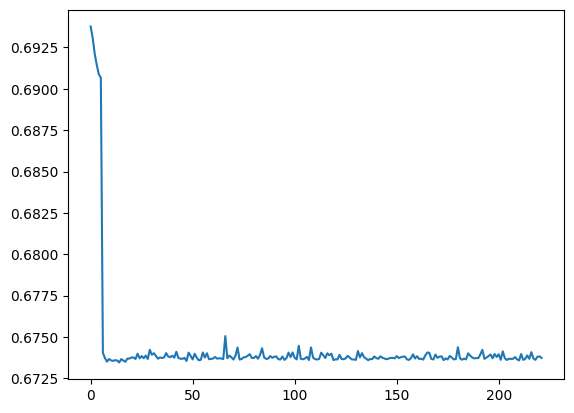

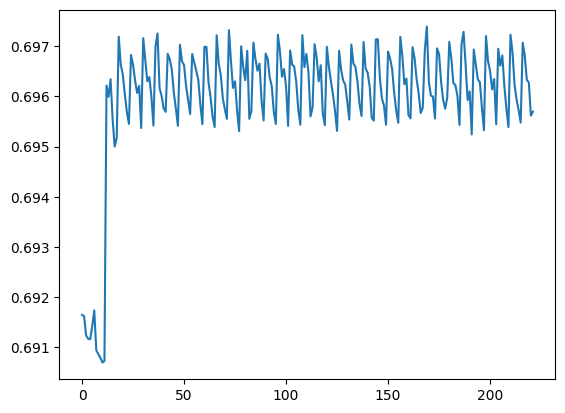

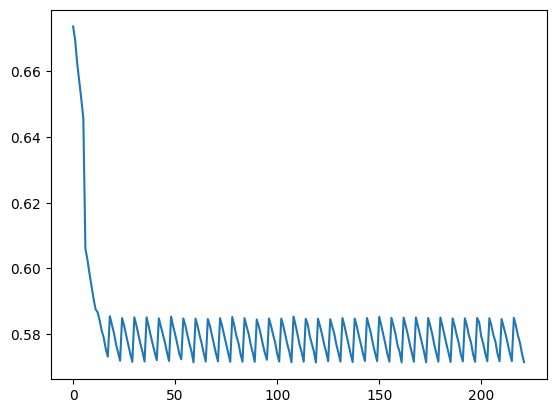

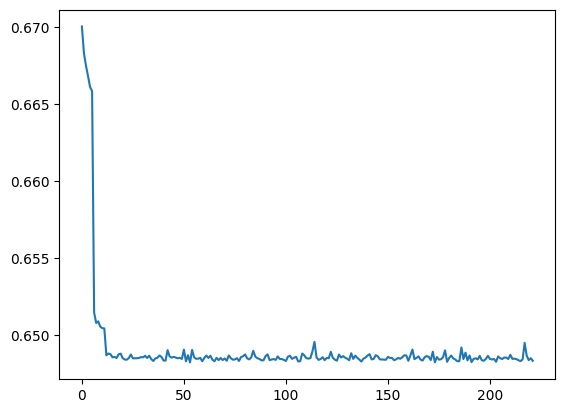

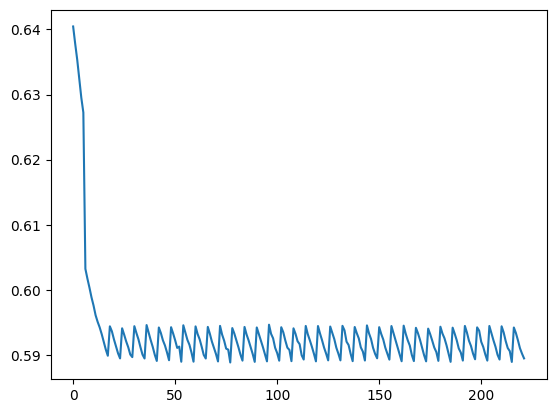

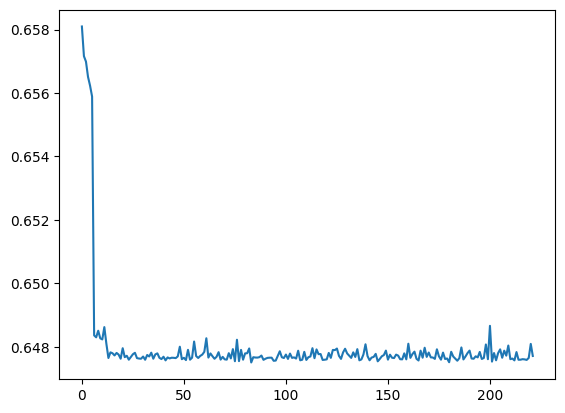

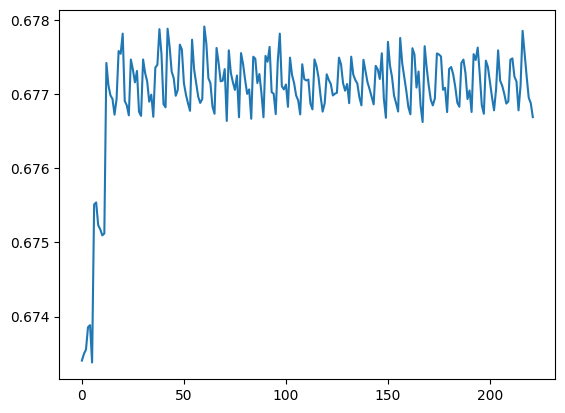

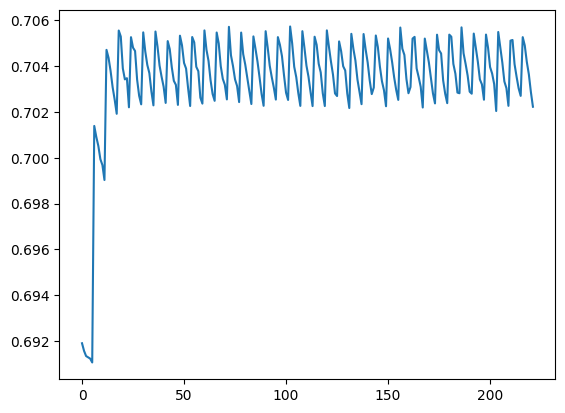

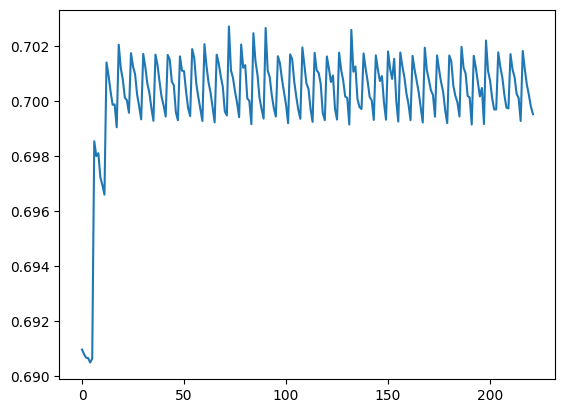

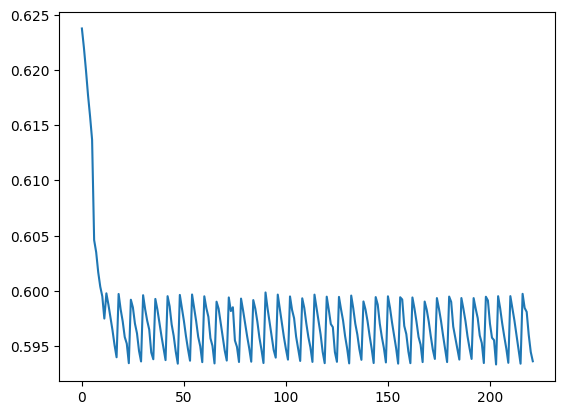

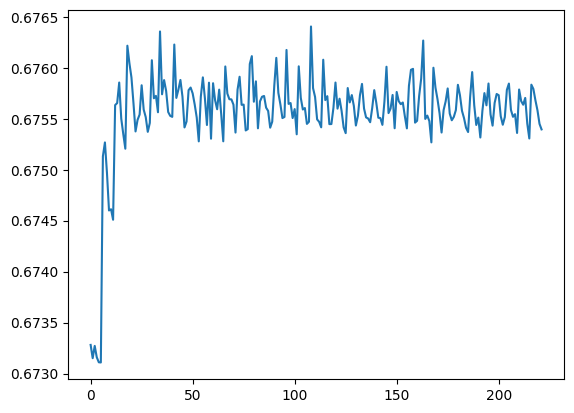

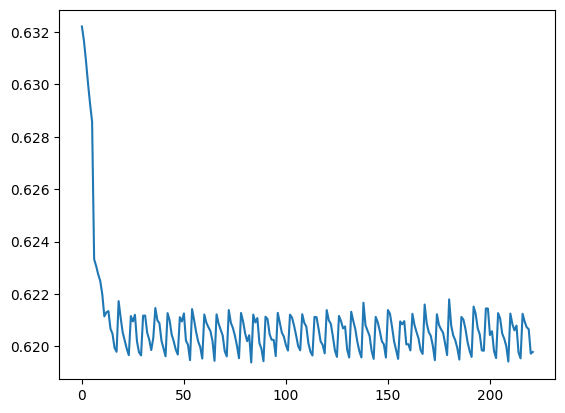

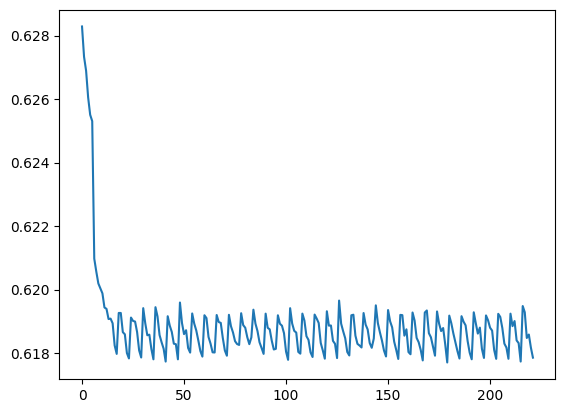

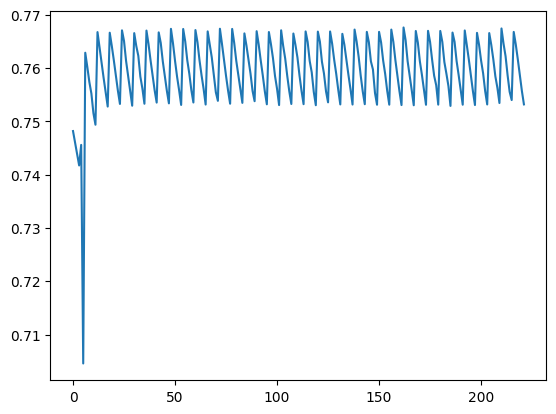

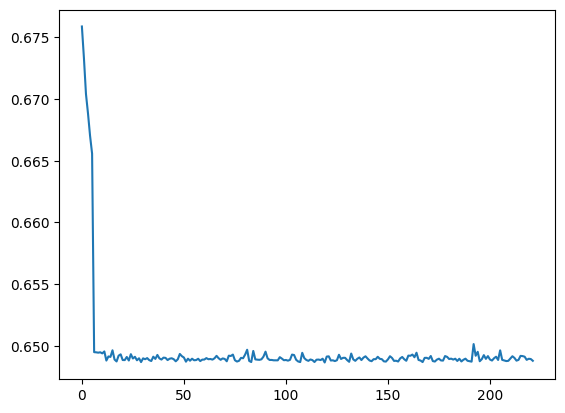

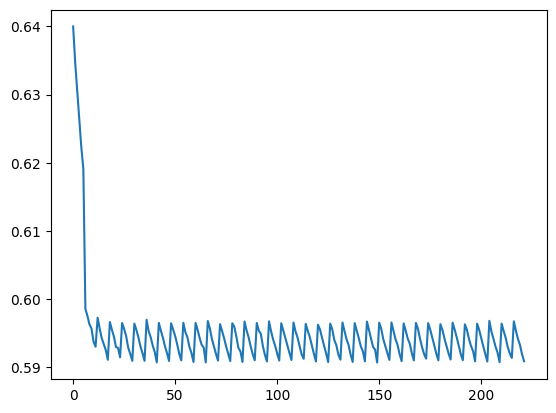

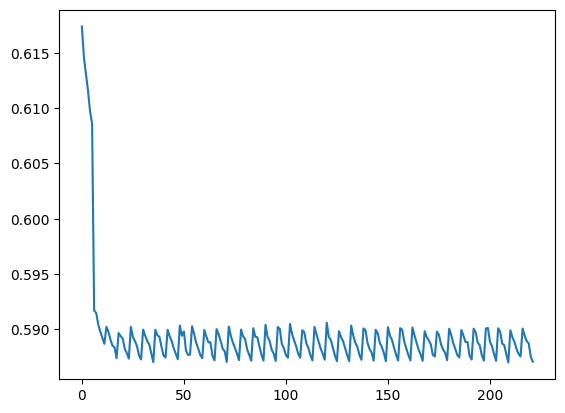

In [40]:
Loss_c_file = open("trainingFinal_modelC.json")
Loss_C = json.load(Loss_c_file)
loss_c = {}
for i in range(0, 20):
    loss_c[i] = []
count = 0
for i in Loss_C:
    loss_c[count%20].extend(i['loss'])
    count += 1
for i in range(0,20):
    plt.plot(loss_c[i])
    plt.show()

0


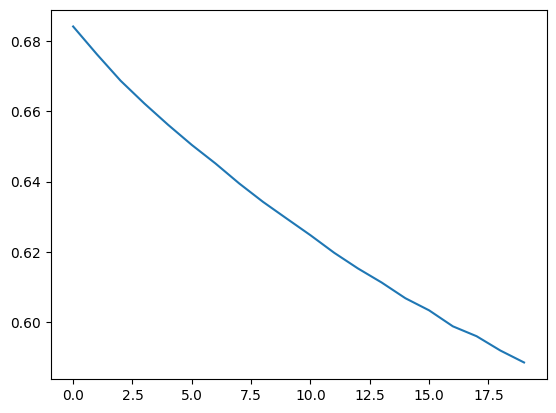

1


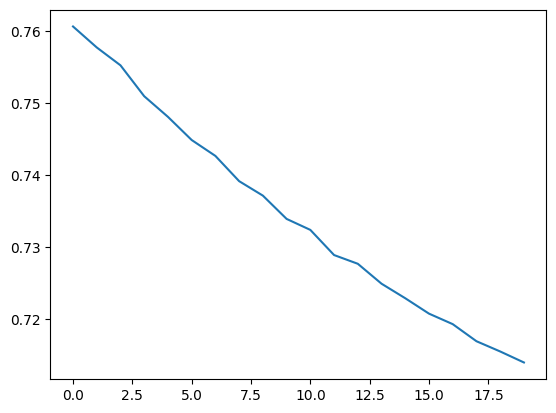

2


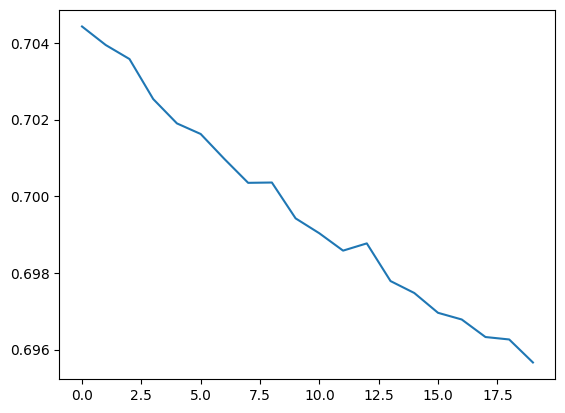

3


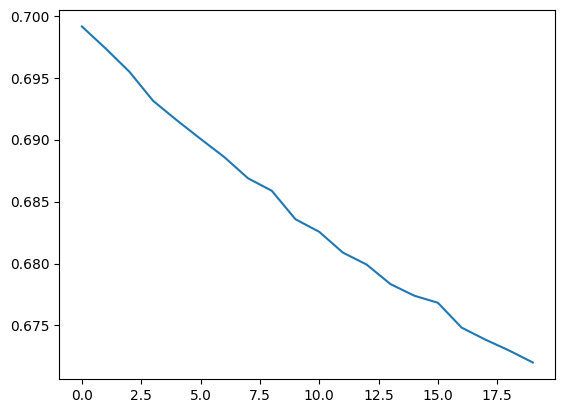

4


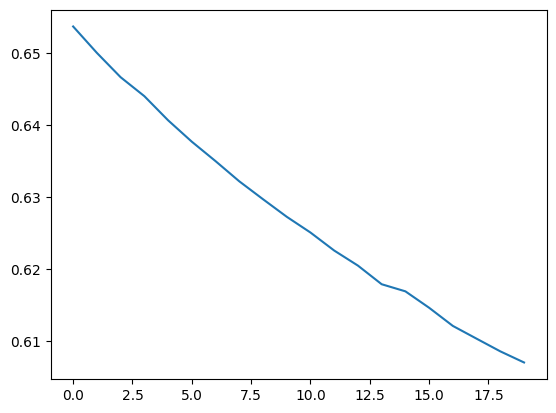

5


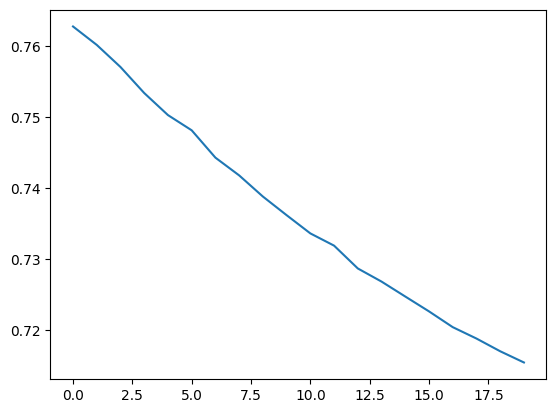

6


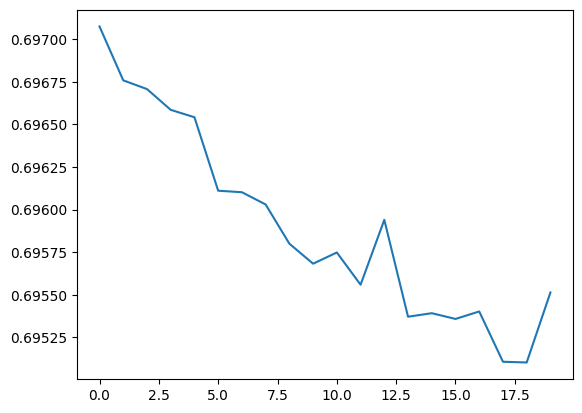

7


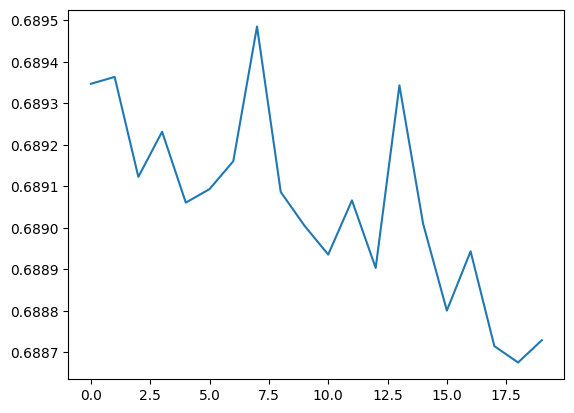

8


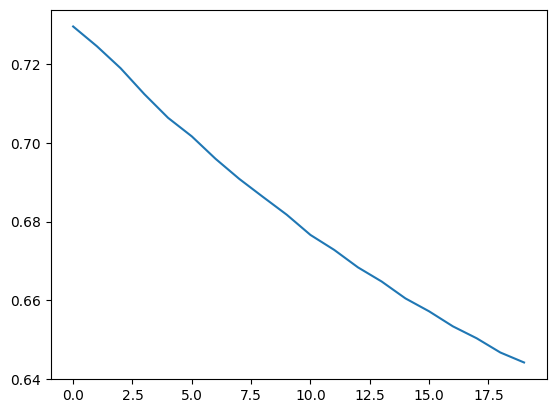

9


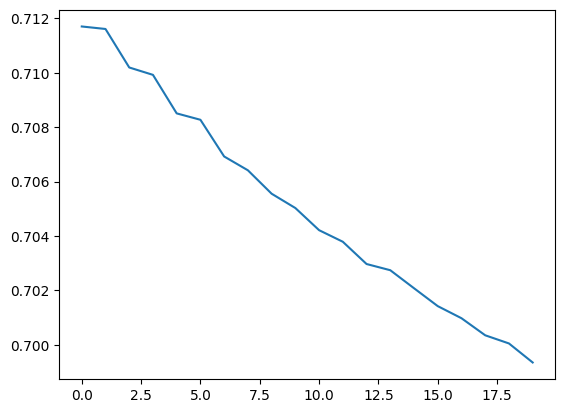

10


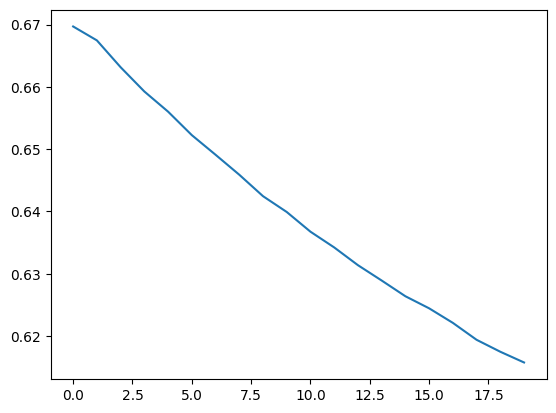

11


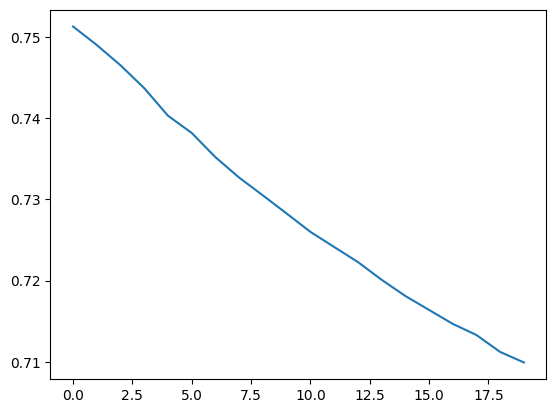

12


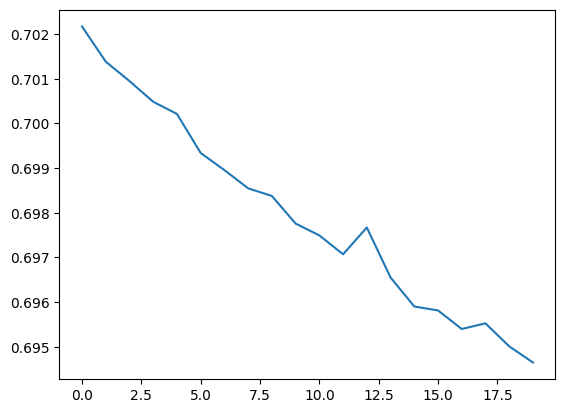

13


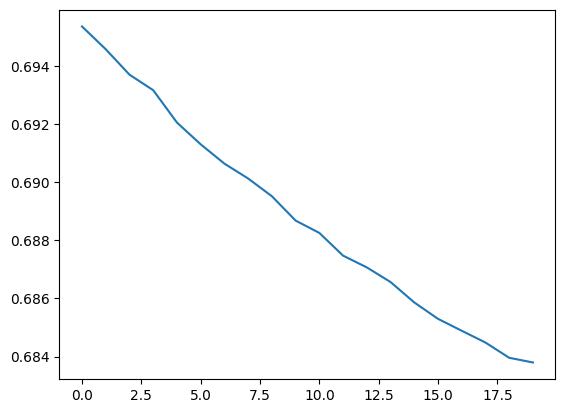

14


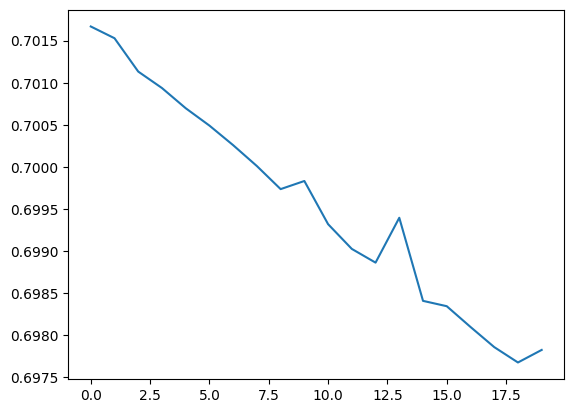

15


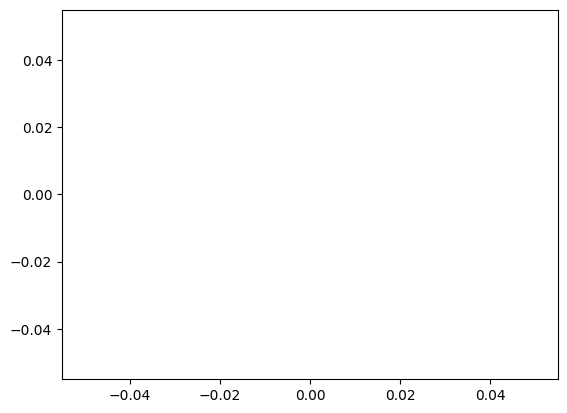

16


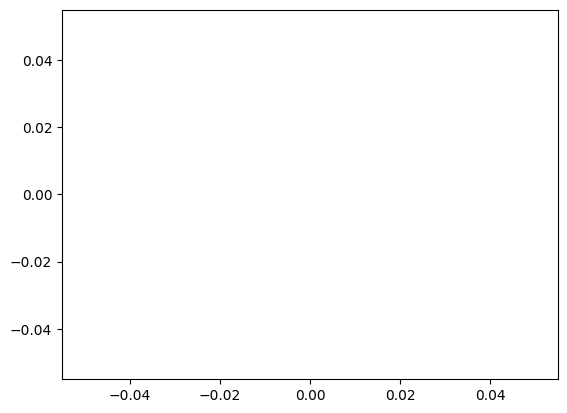

17


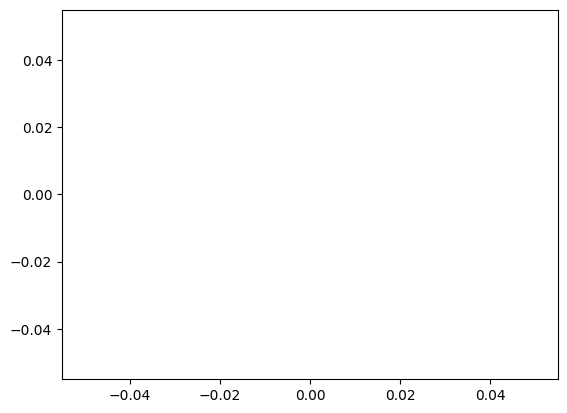

18


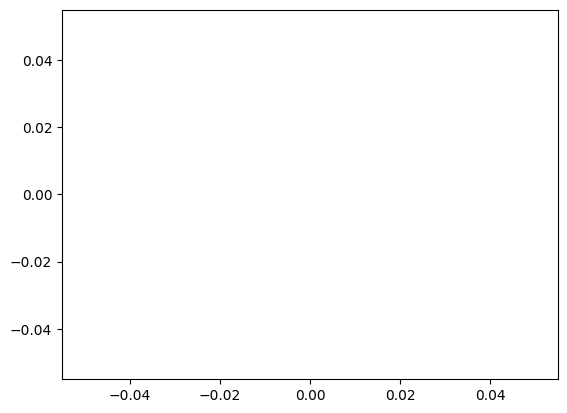

19


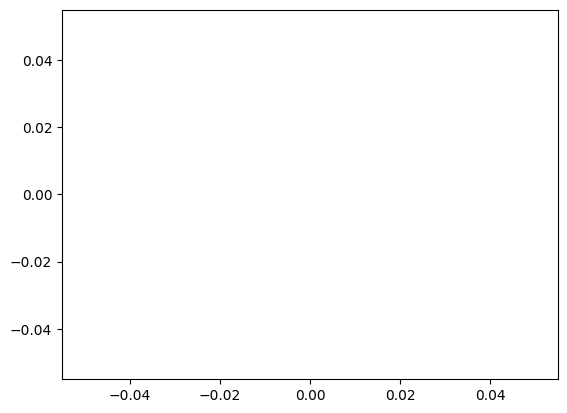

In [14]:
Loss_b_file = open("trainingFinal_bin1_modelC.json")
Loss_B = json.load(Loss_b_file)
loss_b = {}
for i in range(0, 20):
    loss_b[i] = []
count = 0
for i in Loss_B:
    loss_b[count%14].extend(i['loss'])
    count += 1
for i in range(0,20):
    print(i)
    plt.plot(np.asarray(loss_b[i]))
    plt.show()

0


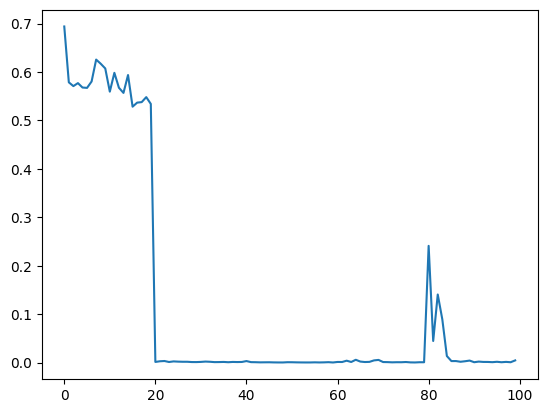

1


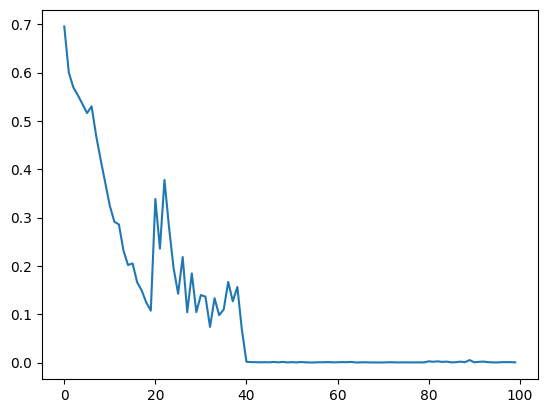

2


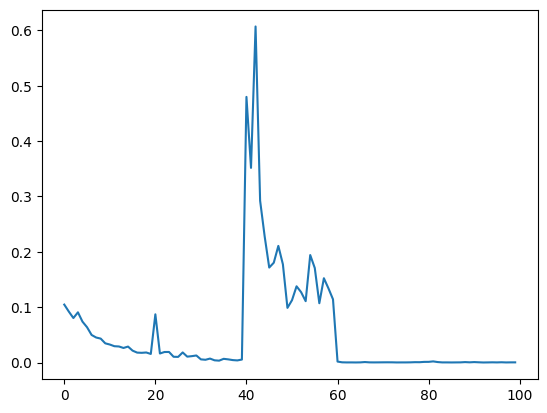

3


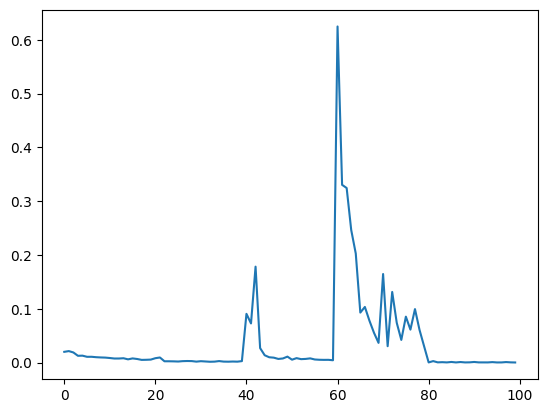

4


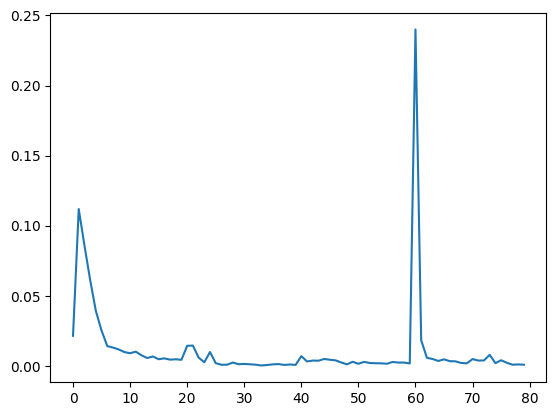

5


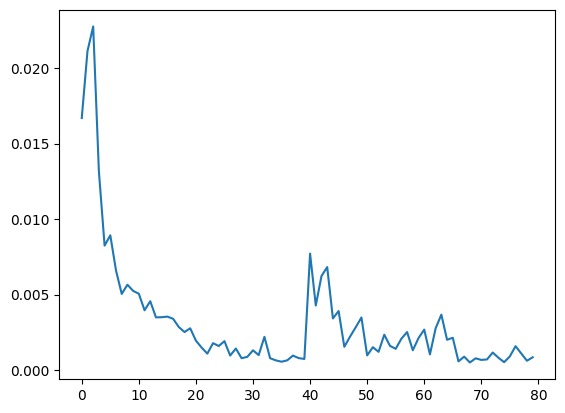

6


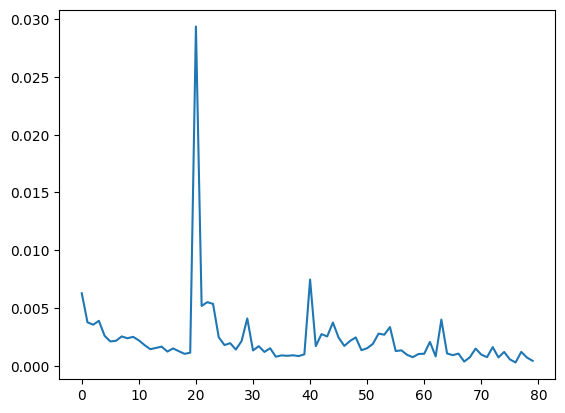

7


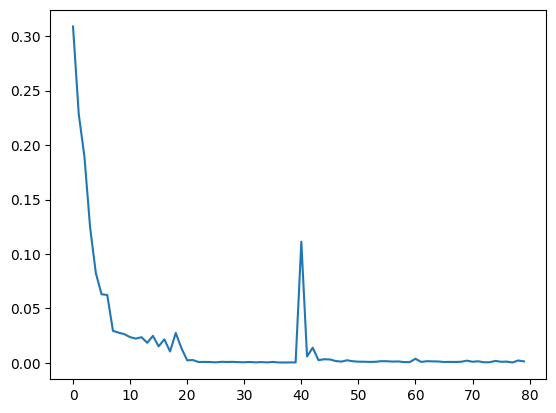

8


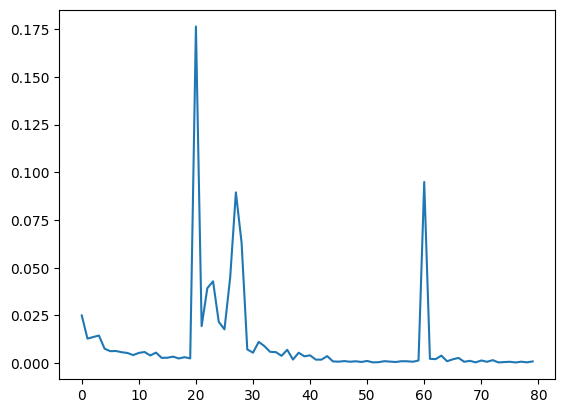

9


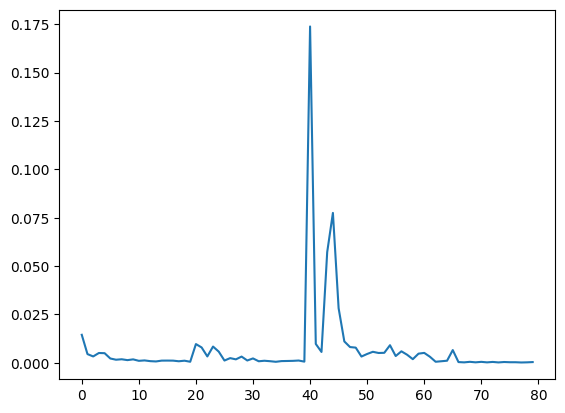

10


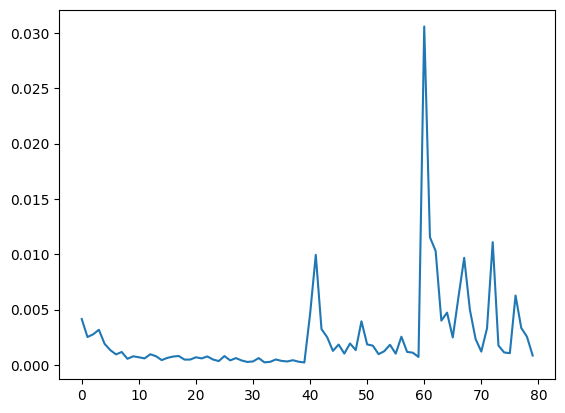

11


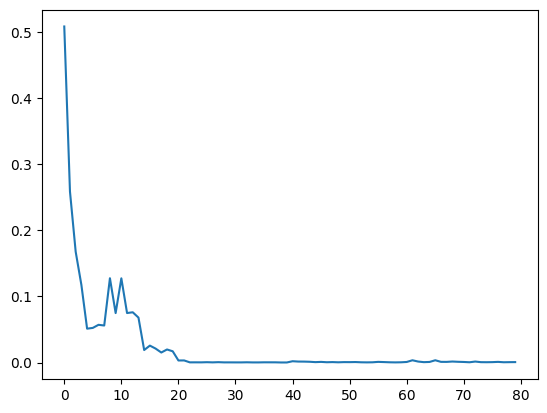

12


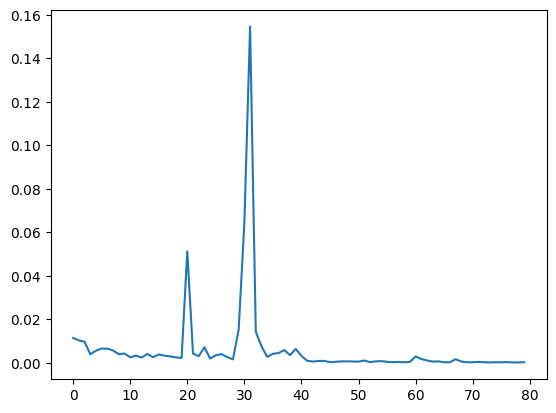

13


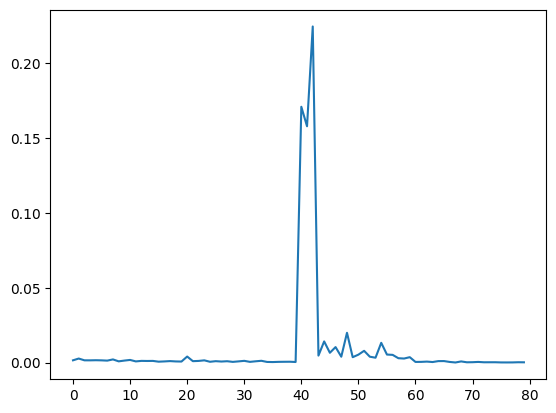

In [3]:
Loss_b_file = open("trainingFinal_bin1_modelC.json")
Loss_B = json.load(Loss_b_file)
loss_b = {}
for i in range(0, 20):
    loss_b[i] = []
count = 0
for i in Loss_B:
    loss_b[count%14].extend(i['loss'])
    count += 1
for i in range(0,14):
    print(i)
    plt.plot(np.asarray(loss_b[i]))
    plt.show()

0


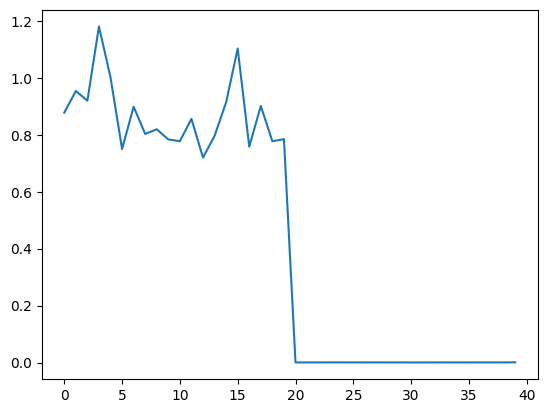

1


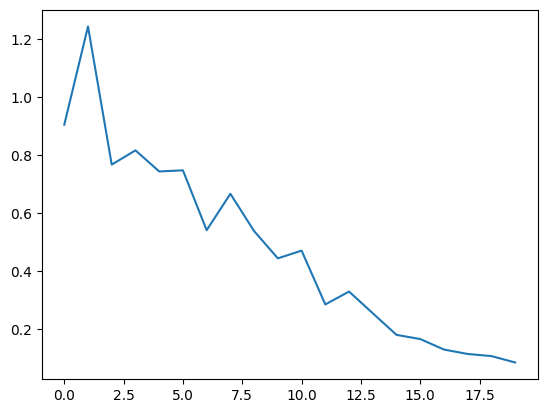

2


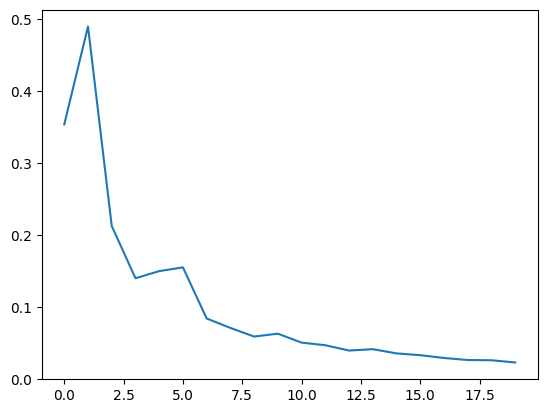

3


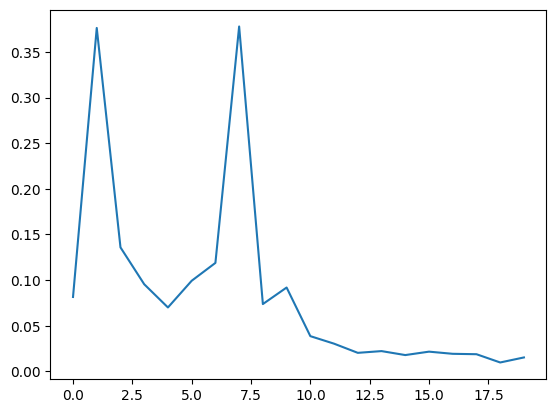

4


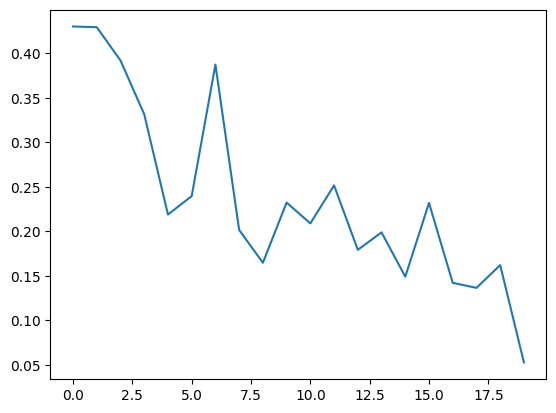

5


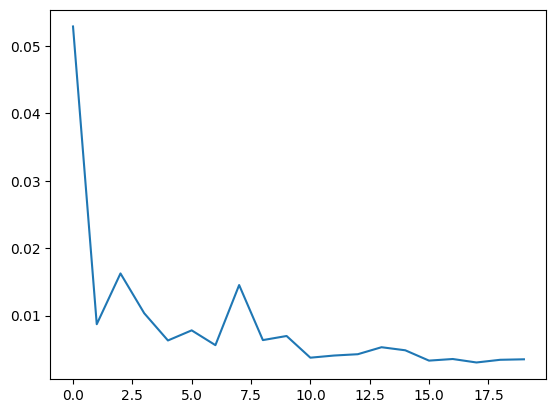

6


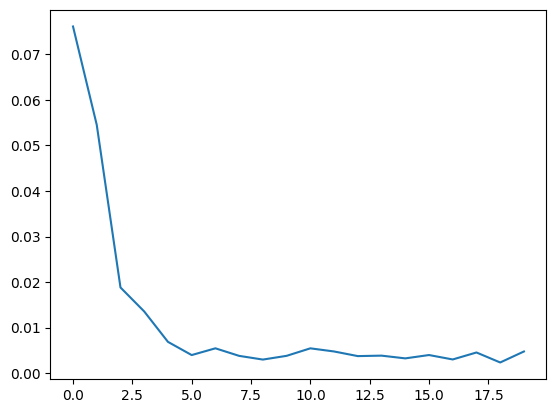

7


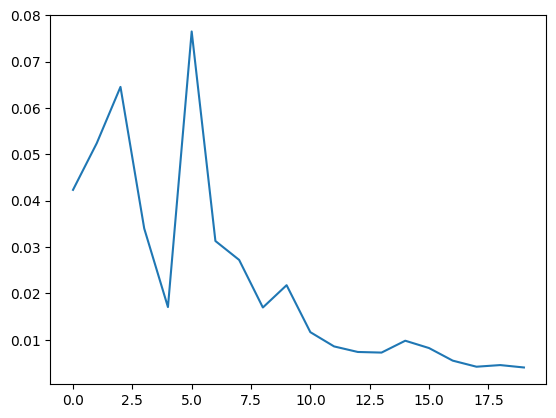

8


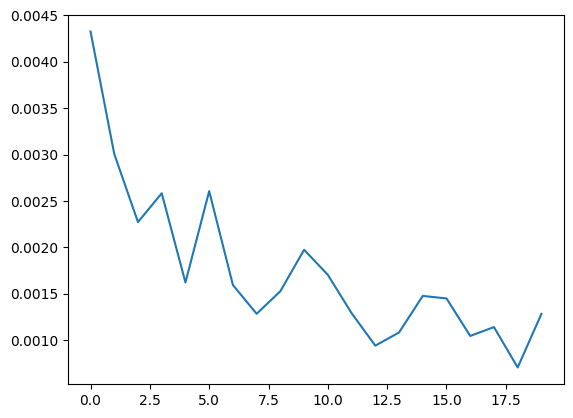

9


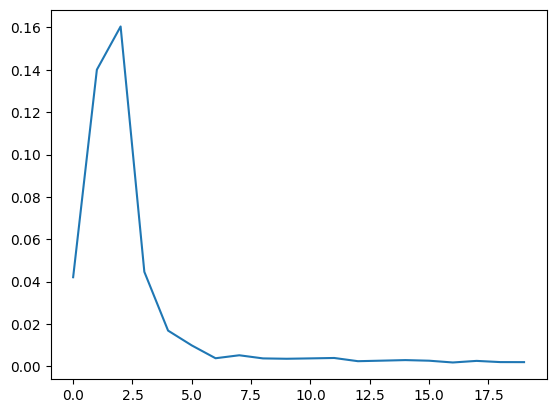

10


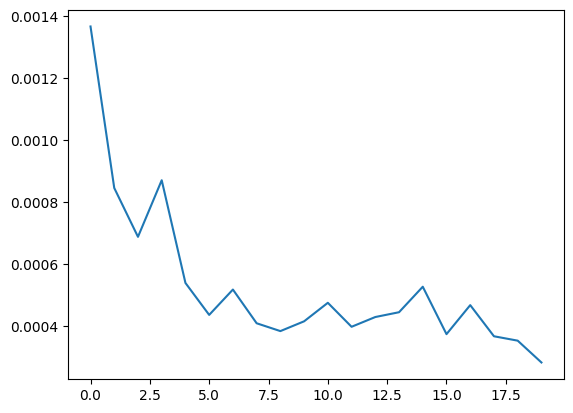

11


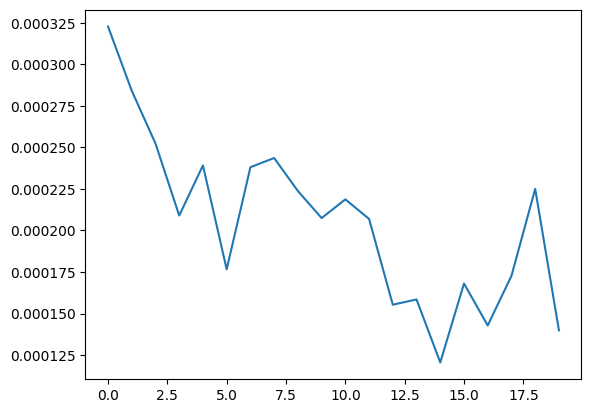

12


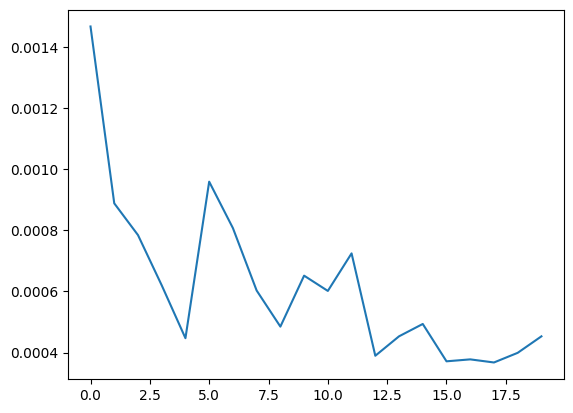

13


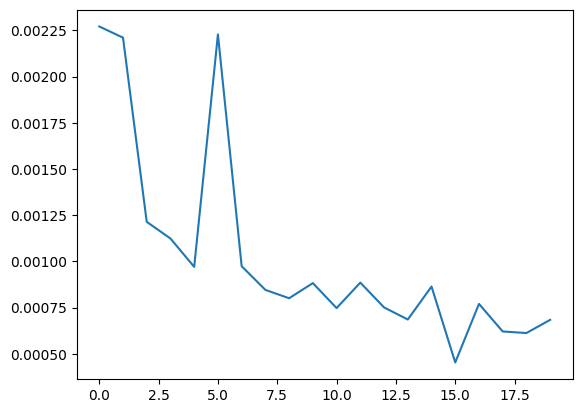

In [2]:
Loss_b_file = open("trainingFinal_bin1_modelB.json")
Loss_B = json.load(Loss_b_file)
loss_b = {}
for i in range(0, 20):
    loss_b[i] = []
count = 0
for i in Loss_B:
    loss_b[count%14].extend(i['loss'])
    count += 1
for i in range(0,14):
    print(i)
    plt.plot(np.asarray(loss_b[i]))
    plt.show()

<h3> Accuracy Graphs </h3>

In [ ]:
import tensorflow as tf
import os
import nibabel as nib
import numpy as np

2022-12-13 10:02:27.426172: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-12-13 10:02:27.521627: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2022-12-13 10:02:27.911105: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: :/home/bryan/miniconda3/envs/tf/lib/
2022-12-13 10:02:27.911151: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer_plugin.so.7'; dlerror: libnvinfer_plugin

<h4> load data </h4>

In [7]:
Scans = [f.path for f in os.scandir("TestData")]
def loadData(subjs):
    tmp = []
    Y = []
    for i in subjs:
        tmp.append(nib.load(i).get_fdata())
        if "HC" in i:
            Y.append([0,1])
        else:
            Y.append([1,0])
    tmp = np.asarray(tmp)
    return(tmp.reshape(len(subjs), 216, 180, 216,1), np.asarray(Y))
TestSubjs = loadData(Scans)

In [78]:
x = model.predict_on_batch(TestSubjs[0][0:3])

In [81]:
np.max(TestSubjs[0][0])

0.6229976699579601

In [82]:
np.max(TestSubjs[0][1])

0.4730250143694456

In [71]:
model = tf.keras.models.load_model('ModelSave/modelC')
model.load_weights('tmpFolderC/weight19.h5')
resultsC = [model.predict(np.asarray([i])) for i in TestSubjs[0]]

1/1 [==============================] - 0s 27ms/step


In [72]:
resultsC

[array([[0.7702994 , 0.22970058]], dtype=float32),
 array([[0.7702994 , 0.22970058]], dtype=float32),
 array([[0.7702994 , 0.22970058]], dtype=float32),
 array([[0.7702994 , 0.22970058]], dtype=float32),
 array([[0.7702994 , 0.22970058]], dtype=float32),
 array([[0.7702994 , 0.22970058]], dtype=float32),
 array([[0.7702994 , 0.22970058]], dtype=float32),
 array([[0.7702994 , 0.22970058]], dtype=float32),
 array([[0.7702994 , 0.22970058]], dtype=float32),
 array([[0.7702994 , 0.22970058]], dtype=float32),
 array([[0.7702994 , 0.22970058]], dtype=float32),
 array([[0.7702994 , 0.22970058]], dtype=float32),
 array([[0.7702994 , 0.22970058]], dtype=float32),
 array([[0.7702994 , 0.22970058]], dtype=float32),
 array([[0.7702994 , 0.22970058]], dtype=float32),
 array([[0.7702994 , 0.22970058]], dtype=float32),
 array([[0.7702994 , 0.22970058]], dtype=float32),
 array([[0.7702994 , 0.22970058]], dtype=float32),
 array([[0.7702994 , 0.22970058]], dtype=float32),
 array([[0.7702994 , 0.22970058

In [66]:
model = tf.keras.models.load_model('ModelSaveB/modelB')
model.load_weights('tmpFolderB/weight19.h5')
resultsB = model.predict(TestSubjs[0], batch_size = 1)

30/30 [==============================] - 1s 35ms/step


In [67]:
resultsB

array([[0.7274078 , 0.27259222],
       [0.7274078 , 0.27259222],
       [0.7274078 , 0.27259222],
       [0.7274078 , 0.27259222],
       [0.7274078 , 0.27259222],
       [0.7274078 , 0.27259222],
       [0.7274078 , 0.27259222],
       [0.7274078 , 0.27259222],
       [0.7274078 , 0.27259222],
       [0.7274078 , 0.27259222],
       [0.7274078 , 0.27259222],
       [0.7274078 , 0.27259222],
       [0.7274078 , 0.27259222],
       [0.7274078 , 0.27259222],
       [0.7274078 , 0.27259222],
       [0.7274078 , 0.27259222],
       [0.7274078 , 0.27259222],
       [0.7274078 , 0.27259222],
       [0.7274078 , 0.27259222],
       [0.7274078 , 0.27259222],
       [0.7274078 , 0.27259222],
       [0.7274078 , 0.27259222],
       [0.7274078 , 0.27259222],
       [0.7274078 , 0.27259222],
       [0.7274078 , 0.27259222],
       [0.7274078 , 0.27259222],
       [0.7274078 , 0.27259222],
       [0.7274078 , 0.27259222],
       [0.7274078 , 0.27259222],
       [0.7274078 , 0.27259222]], dtype=flo

In [18]:
model = tf.keras.models.load_model('ModelSave_bin1C/modelC')
model.load_weights('tmpFolderBin1ModelC/weight20.h5')
resultsC = [model.predict(np.asarray([i])) for i in TestSubjs[0]]

2022-12-13 06:52:17.626760: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:980] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-12-13 06:52:17.629575: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:980] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-12-13 06:52:17.629696: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:980] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-12-13 06:52:17.630124: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags

1/1 [==============================] - 0s 28ms/step


2022-12-13 06:52:20.388592: I tensorflow/stream_executor/cuda/cuda_blas.cc:1614] TensorFloat-32 will be used for the matrix multiplication. This will only be logged once.


1/1 [==============================] - 0s 28ms/step


In [19]:
resultsC

[array([[0.40759185, 0.5924081 ]], dtype=float32),
 array([[0.40759185, 0.5924081 ]], dtype=float32),
 array([[0.40759185, 0.5924081 ]], dtype=float32),
 array([[0.40759185, 0.5924081 ]], dtype=float32),
 array([[0.40759185, 0.5924081 ]], dtype=float32),
 array([[0.40759185, 0.5924081 ]], dtype=float32),
 array([[0.40759185, 0.5924081 ]], dtype=float32),
 array([[0.40759185, 0.5924081 ]], dtype=float32),
 array([[0.40759185, 0.5924081 ]], dtype=float32),
 array([[0.40759185, 0.5924081 ]], dtype=float32),
 array([[0.40759185, 0.5924081 ]], dtype=float32),
 array([[0.40759185, 0.5924081 ]], dtype=float32),
 array([[0.40759185, 0.5924081 ]], dtype=float32),
 array([[0.40759185, 0.5924081 ]], dtype=float32),
 array([[0.40759185, 0.5924081 ]], dtype=float32),
 array([[0.40759185, 0.5924081 ]], dtype=float32),
 array([[0.40759185, 0.5924081 ]], dtype=float32),
 array([[0.40759185, 0.5924081 ]], dtype=float32),
 array([[0.40759185, 0.5924081 ]], dtype=float32),
 array([[0.40759185, 0.5924081 

In [5]:
Scans = [f.path for f in os.scandir("FinalData")]

In [7]:
countHC = 0
countEP = 0
for i in Scans:
    if "HC" in i:
        countHC += 1
    else:
        countEP += 1
    

In [9]:
countEP

145

In [14]:
x = nib.load('spaciallyNormal/EP0.nii.gz').get_fdata()

In [15]:
model = tf.keras.models.load_model('ModelSave_binC/modelC')
model.load_weights('tmpFolderBinModelC/weight156.h5')
resultsC = model.predict(np.asarray([x]))

1/1 [==============================] - 0s 122ms/step


In [12]:
model = tf.keras.models.load_model('ModelSave_bin1B/modelB')
model.load_weights('tmpFolderBin1ModelB/weight15.h5')
resultsC = [model.predict(np.asarray([i])) for i in TestSubjs[0]]

1/1 [==============================] - 0s 59ms/step


In [15]:
for i in range(len(resultsC)):
    print(np.argmax(list(resultsC[i])[0]), np.argmax(TestSubjs[1][i]))

0 0
0 0
0 0
0 0
1 1
1 1
0 0
0 0
0 0
0 0
1 1
0 0
0 0
0 0
1 1
0 0
1 0
0 0
1 1
1 1
1 1
1 1
0 0
1 1
0 0
0 0
0 0
0 0
1 1
0 0


In [8]:
model = tf.keras.models.load_model('ModelSave_bin_small1C/modelC')
model.load_weights('tmpFolderBin1ModelC/weight15.h5')
resultsC = [model.predict(np.asarray([i])) for i in TestSubjs[0]]

2022-12-13 10:04:17.748056: I tensorflow/stream_executor/cuda/cuda_dnn.cc:384] Loaded cuDNN version 8100
2022-12-13 10:04:18.151607: I tensorflow/core/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2022-12-13 10:04:18.152103: I tensorflow/core/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2022-12-13 10:04:18.152115: W tensorflow/stream_executor/gpu/asm_compiler.cc:80] Couldn't get ptxas version string: INTERNAL: Couldn't invoke ptxas --version
2022-12-13 10:04:18.152479: I tensorflow/core/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2022-12-13 10:04:18.152512: W tensorflow/stream_executor/gpu/redzone_allocator.cc:314] INTERNAL: Failed to launch ptxas
Relying on driver to perform ptx compilation. 
Modify $PATH to customize ptxas location.
This message will be only logged once.


1/1 [==============================] - 0s 46ms/step


2022-12-13 10:04:18.542339: I tensorflow/stream_executor/cuda/cuda_blas.cc:1614] TensorFloat-32 will be used for the matrix multiplication. This will only be logged once.


1/1 [==============================] - 0s 44ms/step


In [12]:
resultsC

[array([[1.000000e+00, 1.982661e-09]], dtype=float32),
 array([[1.0000000e+00, 1.5477356e-10]], dtype=float32),
 array([[9.999999e-01, 8.612340e-08]], dtype=float32),
 array([[1.0000000e+00, 2.6713926e-10]], dtype=float32),
 array([[0.19706273, 0.8029372 ]], dtype=float32),
 array([[2.3754376e-04, 9.9976248e-01]], dtype=float32),
 array([[1.0000000e+00, 1.0354296e-08]], dtype=float32),
 array([[1.000000e+00, 3.606841e-09]], dtype=float32),
 array([[1.00000e+00, 9.66788e-10]], dtype=float32),
 array([[1.0000000e+00, 9.0385885e-09]], dtype=float32),
 array([[0.96366924, 0.03633078]], dtype=float32),
 array([[0.9745482 , 0.02545183]], dtype=float32),
 array([[1.0000000e+00, 2.1255842e-09]], dtype=float32),
 array([[1.0000000e+00, 2.6236235e-10]], dtype=float32),
 array([[0.02871588, 0.97128415]], dtype=float32),
 array([[1.000000e+00, 6.496996e-11]], dtype=float32),
 array([[0.9964251 , 0.00357489]], dtype=float32),
 array([[1.000000e+00, 8.041081e-09]], dtype=float32),
 array([[0.0427252

In [16]:
for i in range(len(resultsC)):
    print(np.argmax(list(resultsC[i])[0]), np.argmax(TestSubjs[1][i]))

0 0
0 0
0 0
0 0
1 1
1 1
0 0
0 0
0 0
0 0
0 1
0 0
0 0
0 0
1 1
0 0
0 0
0 0
1 1
0 1
1 1
1 1
0 0
0 1
0 0
0 0
0 0
0 0
1 1
0 0


In [17]:
err = 0
for i in range(len(resultsC)):
    if np.argmax(list(resultsC[i])[0]) != np.argmax(TestSubjs[1][i]):
        err += 1
        print(resultsC[i], np.argmax(TestSubjs[1][i]))

[[0.96366924 0.03633078]] 1
[[0.7300512  0.26994884]] 1
[[0.9505121  0.04948781]] 1
